# **K-Means Clustering Algorithm Task**
You have to apply k means clustering algorithm on the provided dataset. The output should look like this with a cluster column at the last.                                                                                      


                                           

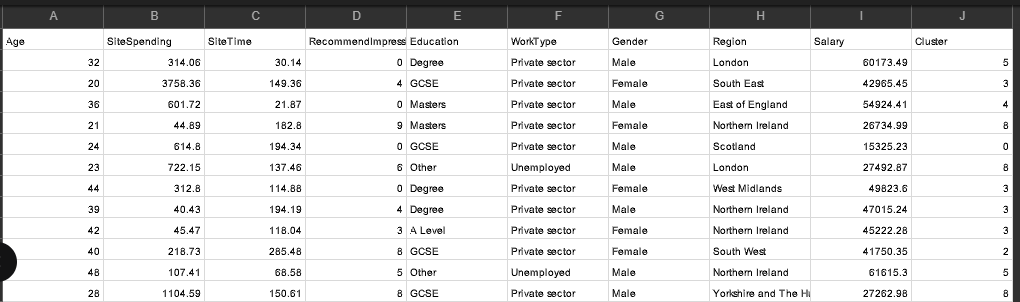

## **Part 1:**                                                             
You have to write algorithm of k-means clustering using only NumPy and pandas. You are not allowed to use any library for Part 1 and extract predicted clusters out of it.

In [26]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [27]:
# Load dataset
def load_dataset():
    df = pd.read_excel('dataset.xlsx')
    return df

# Preprocess dataset: handle categorical variables and normalization
def preprocess_data(df):
    # TODO: Convert categorical features to numeric using one-hot or label encoding
    # TOFO: Apply scaling if needed using StandardScaler
    # TODO: Normalize numerical columns if needed
    # TODO: Drop irrelevant columns if needed
    df_processed = df.copy()
    
    # Label encode categorical variables
    for col in df_processed.select_dtypes(include='object').columns:
        le = LabelEncoder()
        df_processed[col] = le.fit_transform(df_processed[col])

    # Normalize numerical values
    scaler = StandardScaler()
    df_processed[df_processed.columns] = scaler.fit_transform(df_processed[df_processed.columns])

    return df_processed

In [28]:
def kmeans_from_scratch(X, k, max_iters=100):
    np.random.seed(42)

    X = X.to_numpy()  # Ensure X is a NumPy array
    initial_centroid_indices = np.random.choice(X.shape[0], k, replace=False)
    centroids = X[initial_centroid_indices]

    for _ in range(max_iters):
        # Step 1: Assign clusters
        distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)
        labels = np.argmin(distances, axis=1)

        # Step 2: Calculate new centroids
        new_centroids = np.array([
            X[labels == i].mean(axis=0) if np.any(labels == i) else centroids[i]
            for i in range(k)
        ])

        # Step 3: Check for convergence
        if np.allclose(centroids, new_centroids):
            break
        centroids = new_centroids

    return labels, centroids


In [29]:
k = 3
max_iter = 200
df = load_dataset()
df_processed = preprocess_data(df)
labels, centroids = kmeans_from_scratch(df_processed, k)
df['Cluster'] = labels
print(df.head())

   Age  SiteSpending  SiteTime  RecommendImpression Education        WorkType  \
0   32        314.06     30.14                    0    Degree  Private sector   
1   20       3758.36    149.36                    4      GCSE  Private sector   
2   36        601.72     21.87                    0   Masters  Private sector   
3   21         44.89    182.80                    9   Masters  Private sector   
4   24        614.80    194.34                    0      GCSE  Private sector   

   Gender            Region    Salary  Cluster  
0    Male            London  60173.49        0  
1  Female        South East  42965.45        2  
2    Male   East of England  54924.41        0  
3  Female  Northern Ireland  26734.99        2  
4    Male          Scotland  15325.23        0  


## **Part 2:**

Implement this task using the libraries. Explore Libraries of K-mean clustering algorithm.

In [30]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [31]:
df = load_dataset()
df_processed = preprocess_data(df)

# TODO:
# 1. Apply KMeans from sklearn using same k and maximum iterations
# 2. Get predicted labels
k = 3
max_iter = 200
# Apply KMeans from sklearn
kmeans_model = KMeans(n_clusters=k, max_iter=max_iter, random_state=42)
predicted_labels = kmeans_model.fit_predict(df_processed)

# Assign predicted labels to original dataframe
df['Cluster'] = predicted_labels

# Show results
print(df.head())

   Age  SiteSpending  SiteTime  RecommendImpression Education        WorkType  \
0   32        314.06     30.14                    0    Degree  Private sector   
1   20       3758.36    149.36                    4      GCSE  Private sector   
2   36        601.72     21.87                    0   Masters  Private sector   
3   21         44.89    182.80                    9   Masters  Private sector   
4   24        614.80    194.34                    0      GCSE  Private sector   

   Gender            Region    Salary  Cluster  
0    Male            London  60173.49        2  
1  Female        South East  42965.45        0  
2    Male   East of England  54924.41        2  
3  Female  Northern Ireland  26734.99        1  
4    Male          Scotland  15325.23        2  


In [32]:
# df['Cluster'] = labels
# print(df.head())

## **Part 3:**
Visualize the clusters using PCA (2D)

In [33]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [34]:
def visualize_clusters(X, labels, title):
    pca = PCA(n_components=2)
    reduced_X = pca.fit_transform(X)
    
    # Step 2: Create scatter plot with cluster labels
    plt.figure(figsize=(8, 6))
    scatter = plt.scatter(reduced_X[:, 0], reduced_X[:, 1], c=labels, cmap='viridis', alpha=0.7)

    # Step 3: Add axis labels and title
    plt.xlabel("PCA Component 1")
    plt.ylabel("PCA Component 2")
    plt.title(title)
    plt.colorbar(scatter, label='Cluster')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# TODO:
# 1. Apply PCA to reduce features to 2 dimensions
# 2. Create a scatter plot (use Cluster as color)
# 3. Add axis labels and title

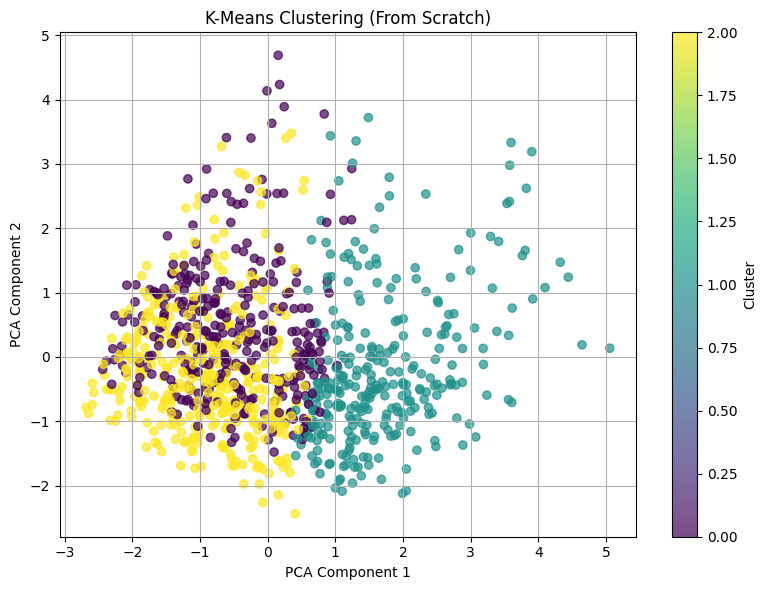

In [37]:
# Call this after scaling and predicting in Part 2
# visualize_clusters(scaled_data, labels, "K-Means Clustering Visualization")
visualize_clusters(df_processed, labels, "K-Means Clustering (From Scratch)")